In [ ]:
# Importing the required libraries

import matplotlib.pyplot as plt
import numpy as np
import scipy.io

from numpy.linalg import pinv

In [ ]:
'''
 Function that returns train and test error for the passed inputs
 x-train - input training data
 y-train - output training data
 x-test - input test data
 y-test - output test data
 degree - degree of the polynomial to be checked from the range 1 to 50
'''
def polyreg(x_train=np.empty(0), y_train=np.empty(0), x_test=np.empty(0), 
            y_test=np.empty(0), degree=1):
  
  # Returning both test and train error as zero if anyone of the parameters 
  # is missing
  if len(x_train) == 0 or len(y_train) == 0 or len(x_test) == 0 or len(
      y_test) == 0:
      print('Training or Test data missing')
      return 0,0

  # Calculating theta values by modifying the train input data and then taking 
  # matrix multiplication with output train data
  degrees_possible = np.array(range(degree+1))
  x_train_multidim = np.power(x_train, degrees_possible)
  temp = np.linalg.pinv(x_train_multidim)
  theta = np.matmul(temp, y_train)

  # Calculating training error from predicted output train matrix and output 
  # train matrix
  y_pred_train = np.matmul(x_train_multidim, theta)          
  no_of_train_inputs = x_train_multidim.shape[0]
  train_error = np.sum(np.power(y_train - y_pred_train, 2))*(0.5/no_of_train_inputs)
  
  # Calculating test error from input test matrix and predicted output 
  # test matrix
  x_test_multidim = np.power(x_test, degrees_possible)
  y_pred_test = np.matmul(x_test_multidim, theta)
  no_of_test_inputs = x_test_multidim.shape[0]
  test_error = np.sum(np.power(y_test-y_pred_test,2))*(0.5/no_of_test_inputs)

  # Plotting graph if degree belongs to 1,2,3,4,5,10,20
  if degree in [1,2,3,4,5,10,15,20]:
      plt.plot(x_train, y_train, 'b.', label='Training data')
      plt.plot(x_test, y_test, 'c.', label='Testing data')
      plt.plot(x_train, y_pred_train, 'm.', label='Predicted data')
      plt.title('d = {0}'.format(degree))
      plt.legend()
      plt.grid()
      plt.show()
  
  return train_error, test_error




# New Section

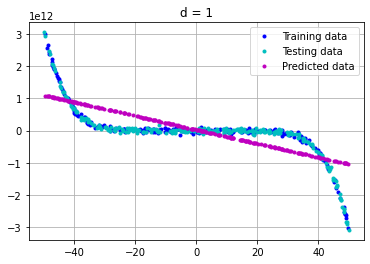

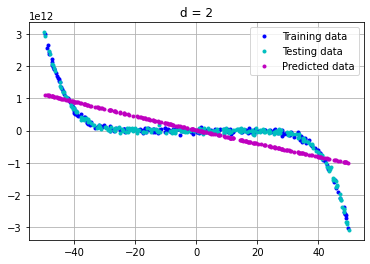

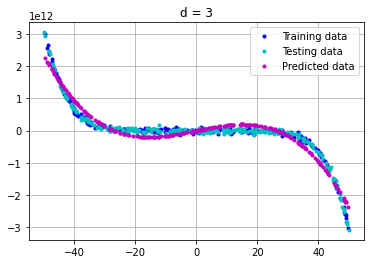

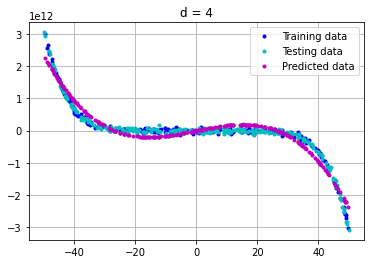

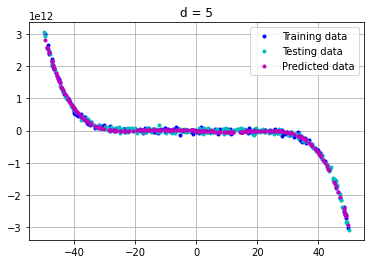

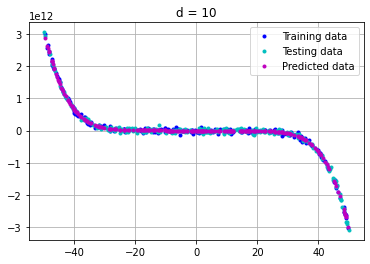

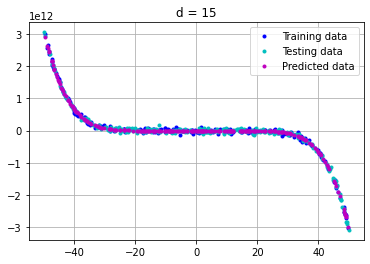

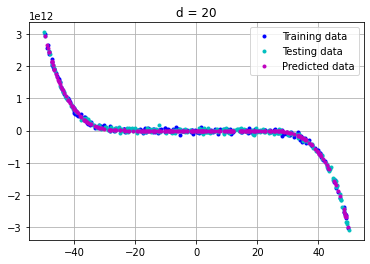

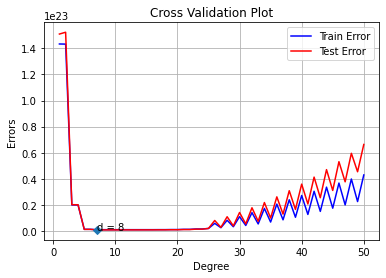

In [ ]:
# Loading .mat file
matlab_data = scipy.io.loadmat('problem1.mat')
x_input = matlab_data['x']
y_output = matlab_data['y']

# Dividing input and output data in two halves as train and test data 
test_size = int(x_input.shape[0]*0.5)
x_train, x_test = x_input[:test_size], x_input[test_size:]
y_train, y_test = y_output[:test_size], y_output[test_size:]

# Degree to be checked are from 1 to 50 (Both included)
max_order_limit = 50
train_errors_list,test_errors_list = [],[]
for degree in range(1,max_order_limit+1):
  train_error,test_error = polyreg(x_train=x_train, y_train=y_train, 
                                   x_test=x_test, y_test=y_test, 
                                   degree=degree)
  train_errors_list.append(train_error)
  test_errors_list.append(test_error)

# Index and Min value of test error is stored from the train_errors_list
min_test_error_value = min(test_errors_list)
min_test_error_index = test_errors_list.index(min_test_error_value)

# Plotting Train Error and Test Error graphs for different 
# degree(Cross Validation) and plotting the point with least Test error
plt.plot(range(1,max_order_limit+1), train_errors_list,'b',label='Train Error')
plt.plot(range(1,max_order_limit+1), test_errors_list, 'r',label='Test Error')
plt.plot(min_test_error_index, min_test_error_value, 'D')
plt.text(min_test_error_index, min_test_error_value, "d = {0}".format(
    min_test_error_index+1))
plt.xlabel('Degree')
plt.ylabel('Errors')
plt.title('Cross Validation Plot')
plt.legend()
plt.grid()
plt.show()

